In [101]:
#1.1

def solveMatTransp(A, b):
    L, U, p = cs111.LUfactor(A)

    #transpose the matrices
    Lt = L.T
    Ut = U.T

   
    y = cs111.Lsolve(Ut, b)
    
    x = cs111.Usolve(Lt, y)

    
    w = np.zeros_like(x) #set t
    
    for i in range(len(b)):
        w[p[i]] = x[i]
    
    return w


In [102]:
#1.2 
import numpy as np
import cs111

AMatrix = np.random.rand(5,5)
b = np.random.rand(5)
print("This is the output for the A matrix:", AMatrix)
print("This is the output for b vector:", b)

x = solveMatTransp(AMatrix, b)
residNorm = np.linalg.norm(b - AMatrix.T @ x) / np.linalg.norm(b)


print("This is the result for x:", x)
#resid norm print
print("This is the relative residual norm answer:", residNorm)


This is the output for the A matrix: [[0.93294099 0.02575026 0.48068617 0.31759643 0.95324563]
 [0.15890884 0.23619077 0.52724262 0.07160989 0.96522422]
 [0.91956899 0.77267434 0.16734804 0.11722674 0.43848582]
 [0.4141278  0.59686654 0.62444012 0.00171632 0.38215971]
 [0.53225529 0.11622346 0.44984831 0.94323546 0.90901695]]
This is the output for b vector: [0.51753127 0.80130491 0.82429028 0.60786261 0.83532189]
This is the result for x: [-0.48608176  0.17118567  0.14940063  0.95146763  0.77481723]
This is the relative residual norm answer: 9.632936329605454e-17


In [103]:
#2

import numpy as np
import cs111


def test_system(epsilon):
    # create my matrix A and vector b based on epsilon value
    A = np.array([[epsilon, 1], [1, 1]], dtype=float)

    b = np.array([1 + epsilon, 2], dtype=float)

    # this is the values with pivot using this LUSolve 
    xPiv, relativeResPiv = cs111.LUsolve(A, b, pivoting=True)
    errorPivotValue = np.linalg.norm(xPiv - np.array([1, 1], dtype=float))

    # values without pivot 
    xNoPivot, relativeResNoPivot = cs111.LUsolve(A, b, pivoting=False)
    errorNoPivot = np.linalg.norm(xNoPivot - np.array([1, 1], dtype=float))

    return {
        'epsilon': epsilon,

        'with_pivot': (xPiv, errorPivotValue, relativeResPiv),

        'without_pivot': (xNoPivot, errorNoPivot, relativeResNoPivot)
    }

# Test for different epsilon values
epsilons = [10**-4, 10**-8, 10**-16, 10**-20]
results = [test_system(epsils) for epsils in epsilons]

# Print the results
for result in results:
    print(f"This is the value fo the epsilon constant Epsilon: {result['epsilon']}")
    print(f"When Pivot == True this is the value of the computed x: {result['with_pivot'][0]}, Error: {result['with_pivot'][1]}, Relative Residual: {result['with_pivot'][2]}")
    print(f"When Pivot == False this is the value of the computed x: {result['without_pivot'][0]}, Error: {result['without_pivot'][1]}, Relative Residual: {result['without_pivot'][2]}")
    print()


print(f"comment on my results: I can see that has the epsilon value gets closer and closer to zero the relative residual also decreases")

This is the value fo the epsilon constant Epsilon: 0.0001
When Pivot == True this is the value of the computed x: [1. 1.], Error: 0.0, Relative Residual: 0.0
When Pivot == False this is the value of the computed x: [1. 1.], Error: 1.1013412404281553e-13, Relative Residual: 4.925249251117446e-14

This is the value fo the epsilon constant Epsilon: 1e-08
When Pivot == True this is the value of the computed x: [1. 1.], Error: 0.0, Relative Residual: 0.0
When Pivot == False this is the value of the computed x: [0.99999999 1.        ], Error: 6.07747097092215e-09, Relative Residual: 2.7179276390168596e-09

This is the value fo the epsilon constant Epsilon: 1e-16
When Pivot == True this is the value of the computed x: [1. 1.], Error: 1.1102230246251565e-16, Relative Residual: 0.0
When Pivot == False this is the value of the computed x: [2.22044605 1.        ], Error: 1.220446049250313, Relative Residual: 0.5458000657989512

This is the value fo the epsilon constant Epsilon: 1e-20
When Pivot =

In [104]:
#3.1

import numpy as np

def GSSolve(A, b, tol=1e-8, max_iters=10000):

    len, wid = A.shape
    assert len == wid

    bl = b.shape[0]
    assert bl == len

    x = np.zeros_like(b)
    relResnorms = []
    
    for iteration in range(max_iters):
        x_new = np.copy(x)
        for i in range(wid):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        residual = np.linalg.norm(b - np.dot(A, x_new))
        relRes = residual / np.linalg.norm(b)
        relResnorms.append(relRes)
        
        if relRes < tol:
            break
        
        x = x_new
        
    return x, relResnorms

In [105]:
# copied from iterative.py
import numpy as np
import numpy.linalg as npla
import scipy
def JSsolve(A, b, tol = 1e-8, max_iters = 1000, callback = None):
    """Solve a linear system Ax = b for x by the Jacobi iterative method.
    Parameters: 
      A: the matrix.
      b: the right-hand side vector.
      tol: the relative residual at which to stop iterating.
      max_iters: the maximum number of iterations to do. 
      callback: a user function to call at every iteration. 
        The callback function has arguments 'x', 'iteration', and 'residual'
    Outputs (in order):
      x: the computed solution
      rel_res: list of relative residual norms at each iteration.
        The number of iterations actually done is len(rel_res) - 1
    """
    # Check the input
    m, n = A.shape
    assert m == n, "matrix must be square"
    bn, = b.shape
    assert bn == n, "rhs vector must be same size as matrix"

    # Split A into diagonal D plus off-diagonal C
    d = A.diagonal()         # diagonal elements of A as a vector
    # D = np.diag(d)           # diagonal of A as a matrix -- DON'T DO THIS, IT CREATES A HUGE DENSE ARRAY.
    C = A.copy()
    C.setdiag(np.zeros(n))   # A without the diagonal
    
    # Initial guess: x = 0
    x = np.zeros(n)

    # Vector of relative residuals
    # Relative residual is norm(residual)/norm(b)
    # Intitial residual is b - Ax for x=0, or b
    rel_res = [1.0]
        
    # Call user function if specified
    if callback is not None:
        callback(x = x, iteration = 0, residual = 1)

    # Iterate
    for k in range(1, max_iters+1):
        # New x
        x = (b - C @ x) / d

        # Record relative residual
        this_rel_res = npla.norm(b - A @ x) / npla.norm(b)
        rel_res.append(this_rel_res)
                
        # Call user function if specified
        if callback is not None:
            callback(x = x, iteration = k, residual = this_rel_res)
                        
        # Stop if within tolerance    
        if this_rel_res <= tol:
            break
            
    return x, rel_res

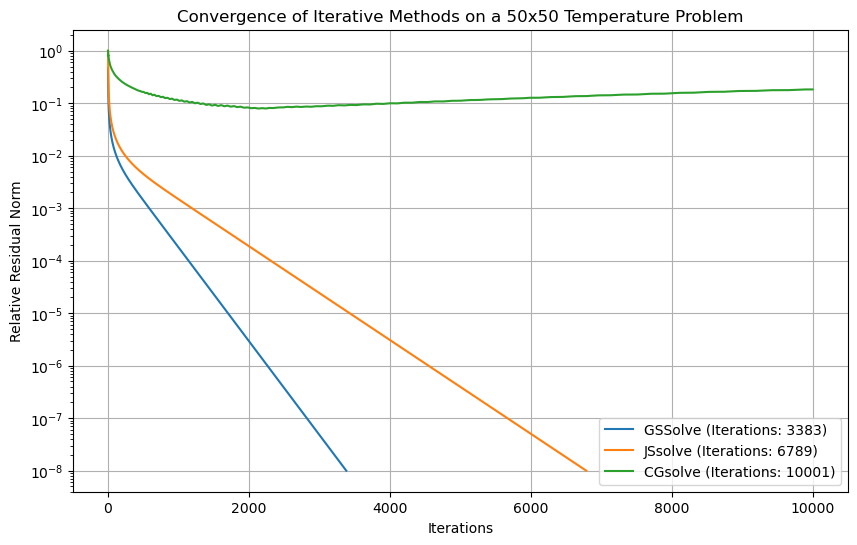

The Gauss-Seidel method converges faster, this is because the Gauss-Seidel method takes less iterations compared to the Jacobian method making it converge faster


In [106]:
import matplotlib.pyplot as plt
from cs111.iterative import CGsolve
from scipy.sparse import csr_matrix

def TempSet(n=50):
    A = np.zeros((n*n, n*n))
    b = np.zeros(n*n)
    for i in range(n):
        for j in range(n):

            index = i*n + j
            if i == 0:  
                A[index, index] = 1
                b[index] = 1
            elif i == n-1 or j == 0 or j == n-1: 
                A[index, index] = 1
                b[index] = 0
            else:
                A[index, index] = 4
                A[index, index-n] = A[index, index+n] = A[index, index-1] = A[index, index+1] = -1
    C = csr_matrix(A)
    return A, b, C






def testOutputs(A, b, C):
    x_gs, res_gs = GSSolve(A, b)
    x_js, res_js = JSsolve(C, b, 1e-8, 10000)
    x_cg, res_cg = CGsolve(A, b, 1e-8, 10000)  
     
    return {
        'GSSolve': {'solution': x_gs, 'residuals': res_gs, 'iterations': len(res_gs)},
        'JSsolve': {'solution': x_js, 'residuals': res_js, 'iterations': len(res_js)},
        'CGsolve': {'solution': x_cg, 'residuals': res_cg, 'iterations': len(res_cg)}
    }


A, b, C = TempSet(50)


results = testOutputs(A, b, C)

plt.figure(figsize=(10, 6))
for method, data in results.items():
    plt.semilogy(data['residuals'], label=f'{method} (Iterations: {data["iterations"]})')

plt.xlabel('Iterations')


plt.ylabel('Relative Residual Norm')
plt.title('Convergence of Iterative Methods on a 50x50 Temperature Problem')
plt.legend()
plt.grid(True)



plt.show()


print(f"The Gauss-Seidel method converges faster, this is because the Gauss-Seidel method takes less iterations compared to the Jacobian method making it converge faster")
